# Linear Regression: From Application to Theory

## Table of Contents

- [1 Introduction](#1-introduction)
- [2 Application](#2-application)
    - [2.1 Disclaimer](#21-disclaimer)
    - [2.2 Data Collection](#22-data-collection)
        - [2.2.1 Pandas](#221-pandas)
        - [2.2.2 Splitting Into Features And Targets](#222-splitting-into-features-and-targets)
    - [2.3 Splitting Data Into Training And Testing Sets](#23-splitting-data-into-training-and-testing-sets)
            - [2.3.1 sklearn](#231-sklearn)
    - [2.4 Building the Linear Regression Model](#24-building-the-linear-regression-model)
    - [2.5 Making Predictions](#25-making-predictions)
    - [2.6 Analysis](#26-analysis)
        - [2.6.1 Comparison](#261-comparison)
        - [2.6.2 Results](#261-results)
    - [2.7 Measuring Performance - Error Metrics](#27-measuring-performance---error-metrics)
        - [2.7.1 Mean Absolute Error (MAE)](#271-mean-absolute-error-mae)
        - [2.7.2 Mean Squared Error (MSE)](#272-mean-squared-error-mse)
        - [2.7.3 Root Mean Squared Error (RMSE)](#273-root-mean-squared-error-rmse)
        - [2.7.4 $R^2$](#274-r-squared)
        - [2.7.5 Mean Absolute Percentage Error (MAPE)](#275-mean-absolute-percentage-error-mape)
        - [2.7.6 Interpretation](#276-interpretation)
    - [2.8 Improving the Model](#28-improving-the-model)
        - [2.8.1 Polynomial Regression](#281-polynomial-regression)
        - [2.8.2 Polynomial Regression Model](#282-polynomial-regression-model)
        - [2.8.3 Polynomial Regression Model Performance](#283-polynomial-regression-model-performance)
        - [2.8.4 Additional Thoughts](#284-additional-thoughts)
    - [2.9 Application Conclusion](#29-application-conclusion)
- [3 Theory](#3-theory)
    - [3.1 Introduction to the Theory](#31-introduction-to-the-theory)
    - [3.2 The Equation of a Line](#32-the-equation-of-a-line)
    - [3.3 Finding Parameters $m$ And $b$](#33-finding-parameters-and)
    - [3.4 Cost Function](#34-cost-function)
    - [3.5 Gradient Descent](#35-gradient-descent)
        - [3.5.1 Equations](#351-equations)
        - [3.5.2 Example](#352-example)
- [4 Conclusion](#4-conclusion)
    - [4.1 Next Steps](#41-next-steps)

## 1 Introduction

Imagine you want to predict the weather or a stock price. You start by collecting relevant data such as temperature readings for weather or daily stock prices for the financial market. While studying this data, you may notice certain trends. Sometimes these trends are obvious, but the real challenge lies in systematically representing these trends to make accurate predictions.

Linear regression is the technique we can use for this challenge. Linear regression is designed to predict continous values, such as temperatures or prices, where the outcome can take any number within a range. It's like drawing the best-fitting straight line through your data points, a line that forms a connection between what you know (independent variables) and what you want to predict (dependent variables).

In essence, linear regression is about finding the precise mathematical equation for this line. Once you've determined this equation, you can use it to predict future values, such as tomorrow's weather or next week's stock price.

But linear regression is more than a numerical technique; it's a way to understand relationships within data and to make informed decisions based on those insights.

## 2 Application

To learn more about what Linear Regression is, let's explore an exciting application that can predict stock prices. For this application we'll use the stock market data for Microsoft for the past 24 months from Yahoo Finance. With this we'll build a model that will predict its future price.


### 2.1 Disclaimer

What we'll build here will be an overly simplified stock price prediction model, it is by no means something that should be used in the real world as financial markets are very complicated and incredibly difficult to predict consistently. This is just a learning excercise. With that out of the way, let's continue our learning!


### 2.2 Data Collection

First we'll import the yfinance package and retrieve the stock market data

In [1]:
import yfinance

# Fetch the Microsoft stock price data over the last 24 months
msft = yfinance.Ticker("MSFT")
msft_price_data = msft.history(period="24mo")
print(msft_price_data)

                                 Open        High         Low       Close  \
Date                                                                        
2021-08-23 00:00:00-04:00  297.853861  299.965597  296.478779  299.228943   
2021-08-24 00:00:00-04:00  299.592334  300.211128  296.626084  297.235046   
2021-08-25 00:00:00-04:00  298.885185  299.170033  295.074252  296.635956   
2021-08-26 00:00:00-04:00  295.634037  297.048416  293.630360  293.767853   
2021-08-27 00:00:00-04:00  293.669637  295.516188  291.548069  294.386658   
...                               ...         ...         ...         ...   
2023-08-15 00:00:00-04:00  322.317568  324.403149  320.221999  321.179962   
2023-08-16 00:00:00-04:00  320.799988  324.420013  319.799988  320.399994   
2023-08-17 00:00:00-04:00  320.540009  321.869995  316.209991  316.880005   
2023-08-18 00:00:00-04:00  314.489990  318.380005  311.549988  316.480011   
2023-08-21 00:00:00-04:00  317.929993  319.639893  317.040009  319.515015   

With the data now loaded, we can process it so that it's ready to train our linear regression model.  As you can see from the ouput above, yfinance gives us various characteristics of the stock price for the stock we picked. Some of which are the *Open* price of the stock, which is the price when the day first began, the *High* and *Low* which is the highest and lowest the price ever got throughout the day, and the *Close* which is the last traded price of the stock when the day ended.

We'll focus on the *Close* for this application as it represents a general consensus of the price of the stock for the day. What this means is that given this data, we want to predict what the *Close* price will be for the stock tomorrow, next week, and even next month.

This data is a bit hard to work with as it is and it is not in the correct formats we need. We want to know how the stock price changes over time, so we'll need some kind of time field and the stock price and we'll disregard everything else. We'll be using Pandas to help us work with this data so we can use it to train our linear regression model.

#### 2.2.1 Pandas

Pandas is a powerful Python library for data manipulation and analysis, providing spreadsheet-like functionality for Python. It enables efficient handling of data tables, like sorting, slicing, adding, or modifying rows and columns.

In our case, we'll be using Pandas to create a new `DataFrame` from the 'Close' price data retrieved from Yahoo Finance. A `DataFrame` is a 2-dimensional labeled data structure in Pandas, much like a spreadsheet or SQL table.

In [2]:
import pandas

msft_data = pandas.DataFrame(msft_price_data['Close'])
print(msft_data)

                                Close
Date                                 
2021-08-23 00:00:00-04:00  299.228943
2021-08-24 00:00:00-04:00  297.235046
2021-08-25 00:00:00-04:00  296.635956
2021-08-26 00:00:00-04:00  293.767853
2021-08-27 00:00:00-04:00  294.386658
...                               ...
2023-08-15 00:00:00-04:00  321.179962
2023-08-16 00:00:00-04:00  320.399994
2023-08-17 00:00:00-04:00  316.880005
2023-08-18 00:00:00-04:00  316.480011
2023-08-21 00:00:00-04:00  319.515015

[502 rows x 1 columns]


The `DataFrame` created has one column labeled "Close" and an index labeled "Date". The index is a special field that uniquely identifies each row, and in this case, it represents the date of the closing price.

However, our date index is in a complex format that's not easy to work with for our analysis. To simplify this, we'll add a new column called "Day" to represent the time in a numerical form, ranging from Day 0 up to the last day in our data.

In [3]:
msft_data['Day'] = range(len(msft_data))
print(msft_data)

                                Close  Day
Date                                      
2021-08-23 00:00:00-04:00  299.228943    0
2021-08-24 00:00:00-04:00  297.235046    1
2021-08-25 00:00:00-04:00  296.635956    2
2021-08-26 00:00:00-04:00  293.767853    3
2021-08-27 00:00:00-04:00  294.386658    4
...                               ...  ...
2023-08-15 00:00:00-04:00  321.179962  497
2023-08-16 00:00:00-04:00  320.399994  498
2023-08-17 00:00:00-04:00  316.880005  499
2023-08-18 00:00:00-04:00  316.480011  500
2023-08-21 00:00:00-04:00  319.515015  501

[502 rows x 2 columns]


This new structure, with a numerical day representation, makes it easier to analyze the change in the "Close" price over time, setting the stage for our linear regression analysis.

#### 2.2.2 Splitting into Features and Targets

In machine learning, features are the input variables that describe characteristics of the data, and the target is what you're trying to predict. We use features to predict targets and in this stock prediction application, the feature is the day number (how many days have passed since the start of data collection), and the target is the closing stock price. By analyzing how the closing price changes with the day number, we can predict future closing prices.

We will take the 'Day' feature and tell the model "Here's how many days have passed since the start of the data collection. Tell me what you think the stock price will be on this particular day."

In [4]:
# X is the day number, it is our Features
X = msft_data[['Day']]
# y is the closing price, our target
y = msft_data['Close']

let's visualize what our data looks like by plotting it, Day on the horizontal X-axis and Closing stock price on the vertical Y-axis:

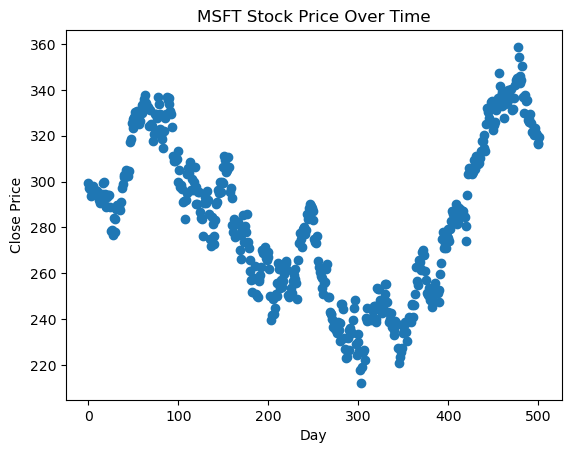

In [5]:
# matplotlib is used to visualize our data as a scatter plot
import matplotlib.pyplot as plot
plot.scatter(X, y)
plot.xlabel('Day')
plot.ylabel('Close Price')
plot.title('MSFT Stock Price Over Time')
plot.show()

### 2.3 Splitting Data into Training and Testing Sets

now that we have our dataset as features (X) and target values (y), we'll divide them into training and testing sets. Splitting the data into training and testing sets allows us to train the model on one subset of the data and test it on another. This way, we can evaluate how well the model performs on data it has never seen before, ensuring that it's not just memorizing the training data but actually learning to make predictions.

#### 2.3.1 Sklearn

scikit-learn (also known as sklearn) is a popular machine learning library for Python, it is freely available for anyone to use and contribute to. It's built on other fundamental scientific and numeric Python libraries such as NumPy and it provides ready-to-use and efficient tools for data analysis and modeling.

In the code below we'll use the function provided by sklearn that can split our data into training and testing sets.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

`train_test_split` split our features X and targets y into training and testing sets. The criteria used for splitting the data was given by `test_size=0.2` which means that 20% of the data gets used for testing and the remaining 80% gets used for training.

Therefore `X_train` has 80% of the data for X, the 'Day' data, and `y_train` has 80% of the data for y, the 'Close' prices data. we'll use this to train our model and then validate it using `X_test` which has the other 20% of the X data and `y_test` which has the other 20% of the y data.


### 2.4 Building the Linear Regression Model

Now that we have our data split into training and testing sets, we're ready to build our model. 

To recap, we're trying to build a model that will be used to make predictions about the closing stock price at a future date using data we've collected over the past 24 months. We've imported historical stock price data from Yahoo Finance, and we've prepared this data to be ready for use with sklearn by using Pandas to extract the features X (Day data) and target values y (closing stock prices) from the data provided by Yahoo Finance. We then further separated this data into training and testing data so that we can have a way to validate how well our model is performing.

Now, to use this data to build our model we'll use the tools made available by sklearn.

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

We've called the `LinearRegression` function from `sklearn` so now we have a linear regression model. This model will be capable of finding a pattern in the data we give it, it'll be able to perform linear regression to find the linear equation that best represents the data we'll give it. Once it has this equation, it can be used to make predictions about future stock prices. (We'll learn more about the magic behind this code in the [Theory section](#3-theory)).

The next step is to train this model with our specific data.

In [8]:
model.fit(X_train, y_train)

LinearRegression()

by calling `.fit` on the model we've essentially trained it. The term *fitting* means to find the best linear equation that represents the relationship between X (Day) and y (close price). In this step the model has found a relationship in the training data we've provided.


### 2.5 Making Predictions

now that the model has been trained, we can use it to make predictions.

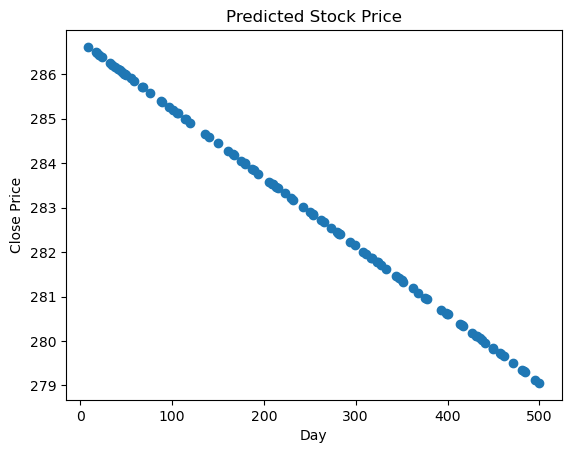

In [9]:
y_pred = model.predict(X_test)
plot.scatter(X_test, y_pred)
plot.xlabel('Day')
plot.ylabel('Close Price')
plot.title('Predicted Stock Price')
plot.show()

Here we've taken the portion of the feature X data (Days) we set aside for testing in order to make some predictions about our target y (close prices). Our model thinks it knows what pattern our data is following, it thinks it can tell us a Closing price if we just give it a day, even if it has never seen that day before in the training data. 

`y_pred` contains the predicted closing prices for each of the days in our testing X data. Our linear regression model found a general trend the data follows during its training and has provided us with predictions that lie along this trend line. In other words, we've been given the linear equation that describes our data set. To better visualize this, we'll plot the predictions as a line

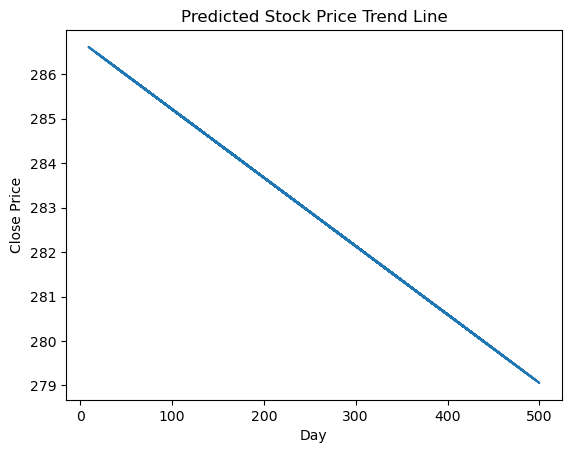

In [10]:
plot.plot(X_test, y_pred)
plot.xlabel('Day')
plot.ylabel('Close Price')
plot.title('Predicted Stock Price Trend Line')
plot.show()

### 2.6 Analysis
#### 2.6.1 Comparison
Now that we have our predictions, we can test and validate how well our model is performing. We know what the actual y values should be and we know what the closing stock prices for the days in `X_test` are since we have them in `y_test`. Below we'll compare the predicted closing stock prices with the actual stock prices over the same days in `X_test`.

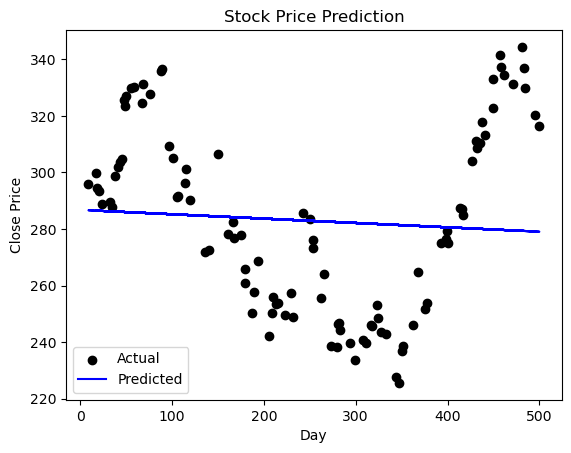

In [11]:
plot.scatter(X_test, y_test, color='black')
plot.plot(X_test, y_pred, color='blue')
plot.xlabel('Day')
plot.ylabel('Close Price')
plot.title('Stock Price Prediction')
plot.legend(['Actual', 'Predicted'])
plot.show()

#### 2.6.1 Results

As you may have noticed, our model's predictions represented as the blue line doesn't capture the vast majority of the actual data points. There are some actual prices that are far away from the line, while others lie somewhere along the line. How would you rate the performance of this model? Although it may be clear from the chart, there are a few more ways to measure the models performance and calculate the error of each prediction vs the actual stock price. Getting a sense of the errors will help us in better understanding the effectiveness of our model and how we may improve it.

### 2.7 Measuring Performance - Error Metrics

Understanding how well our model is doing requires us to measure the error. The error is the difference between the actual value and the predicted value for each data point. There are several common ways to measure this error.

#### 2.7.1 Mean Absolute Error (MAE)

Mean Absolute Error (MAE) is like an average report card for a model's mistakes, telling us how off the predictions are from the actual values. It calculates the average of the absolute differences between the predicted and real outcomes, ignoring whether the errors were too high or too low. A lower MAE means the errors are smaller on average, while a higher MAE indicates larger average errors. It's useful for getting a general sense of the model's accuracy, particularly when the direction of the error doesn't matter. However, since MAE treats all errors equally, it may not emphasize large mistakes as much as other metrics might, which could be an issue depending on what you're modeling.

In [12]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 27.91768057694829


#### 2.7.2 Mean Squared Error (MSE)

Mean Squared Error (MSE) is like a strict teacher grading a model's predictions, taking extra notice of the big mistakes. It calculates the average of the squared differences between the predicted and actual values. The squaring part amplifies larger errors, meaning big mistakes are penalized far more than smaller ones. If you want your model to focus on avoiding large errors, MSE is helpful. A lower MSE means the model is generally more accurate, while a higher MSE suggests more significant mistakes. However, its sensitivity to larger errors might make it react too strongly to outliers, which could be misleading if those are not important for your specific application.

In [13]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 1069.0336970732255


#### 2.7.3 Root Mean Squared Error (RMSE)
Root Mean Squared Error (RMSE) is like a friendlier version of Mean Squared Error (MSE). It eases up on the punishment for big mistakes but still paying attention to them. It does this by calculating the square root of the average of the squared differences between the predicted and actual values. In other words, it takes the square root of the MSE. Unlike MSE however, RMSE's values are in the same units as the target variable, which makes it more relatable to the actual data. For example, if the data we're dealing with is meters, then MSE would result in an error value that is in $m^2$ whereas RMSE would result in a value that is also in meters.  

Think of RMSE as a way to gauge how "off" your model's predictions tend to be. A lower RMSE means closer predictions, while a higher RMSE suggests more substantial errors. If you want to understand the typical magnitude of errors without going to the extreme of MSE, RMSE could be your choice. However, it might still react to outliers more than some other methods, so it's worth considering the nature of your data and what you most want to avoid.

In [14]:
import numpy

rmse  = numpy.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  32.696080760134315


#### 2.7.4 R-Squared ($R^2$) 
The $R^2$ value, also known as the coefficient of determination, tells us how well our predictions follow the trends in the actual data. Think of it as a rating system, with a range from 0 to 1. If $R^2$ is 1, the model's predictions align perfectly with the real outcomes. If it's 0, the model is no better than making guesses based on the average of all outcomes. It helps in understanding how closely the predictions match the overall patterns in the data, making it useful for an overview of the model's performance. However, it doesn't indentify the size of individual errors, focusing instead on the overall fit of the model to the data.

In [15]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.0046339690301420156


#### 2.7.5 Mean Absolute Percentage Error (MAPE)
Mean Absolute Percentage Error (MAPE) provides a percentage view of how off the predictions are from the actual values. It's similar to the MAE discussed in [section 2.7.1](#271-mean-absolute-error-mae), but instead of measuring errors in the same units as the data, it expresses errors as a percentage. It's useful when you need to compare errors across different scales, like comparing sales forecasts for products ranging from thousands to millions, MAPE translates errors into percentages, providing a common ground.

A MAPE value of 0% means that the model's predictions are perfect, with no errors. Higher MAPE values indicate larger average percentage errors


**MAPE Limitations**

MAPE is undefined where the actual value is 0. Also like MAE, it doesn't particularly penalize large errors. Another downside is that, since errors are expressed as percentages of the actual values, for small actual values, a small error may be viewed as a large percentage error.

Here's an example:

* Overestimation: If Actual = 100 and Predicted = 120, the error percentage is 20%.
* Underestimation: If Actual = 100 and Predicted = 80, the error percentage is 20%.

Now, if we change the Actual value while keeping the same magnitude of error:

* Overestimation: Actual = 50, Predicted = 70, error percentage = 40%.
* Underestimation: Actual = 50, Predicted = 30, error percentage = 40%.

As you can see, as the actual value decreases, the percentage error increases for both overestimations and underestimations of the same magnitude. However, since the error is calculated as a percentage of the actual value, the percentage errors can disproportionately penalize overestimations compared to underestimations when dealing with a mix of scales in the data.

**MAPE Summary**

In summary, MAPE helps you see your model's average error as a percentage, providing a relatable view of its accuracy, especially useful when comparing across different units or scales. But keep an eye out for its limitations in specific scenarios.

In [16]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error: {mape} ({mape*100}%)')

Mean Absolute Percentage Error: 0.09959289516710532 (9.959289516710532%)


#### 2.7.6 Interpretation
We've looked at various error metrics, now lets interpret the results. Let's say these were our captured error metrics:

| Error Metric                          | Value       |
| ------------------------------------- | ----------- |
| Mean Absolute Error (MAE)             | 27.241      |
| Mean Square Error  (MSE)              | 1115.563    |
| Root Mean Square Error (RMSE)         | 33.400      |
| $R^2$                                 | 0.01446     |
| Mean Absolute Percentage Error (MAPE) | 9.815%      |

**MAE**

As discussed, the MAE is the average of the errors, but it doesn't give us too much insight about the very large errors. This tells us that on average the predictions are 27.241 units away from the actual values.

**MSE & RMSE**

The MSE tells us we've got very large errors, likely due to outliers that weren't accurately captured by our linear regression model. The RMSE captures the same concept but on the same scale as the original data. At a value of 33.4 for RMSE and 1115.563 on the MSE, this information tells us that our model has very significant discrepancies in predicting stock prices. The values predicted tend to be very different from the actual values.

**$R^2$**

The $R^2$ value is close to 0, which means our linear regression isn't very good at all at capturing the trend our data presents. Its performance is pretty much the same as that of a straight horizontal line at the average value of our data. 

**MAPE**

The MAPE value of 9.815% means that on average, the predictions are off by approximately 9.815% from the actual stock prices. Even though this seems like a small error, in the highly sensitive and competitive world of stock trading, such an error might be significant and quite costly.

### 2.8 Improving the Model
As you might have guessed initially from the plot in [section 2.6.1](#261-comparison), which showed our predicted stock prices and the actual stock prices over some time, our model isn't very good. This is further proven by the error metrics we captured. These results suggest it is time to improve our model.

There are many ways to improve a model, some of which include:

1. **Feature Engineering**: Careful selection and transformation of features can significantly impact model performance. Consider normalization, scaling, and creating interaction terms that may be relevant to stock prices.

2. **Increasing Model Complexity**: A simple linear regression might not be sufficient to capture the underlying pattern in stock prices. Consider using polynomial regression or another form of non-linear regression that might better fit the data.

3. **Regularization**: If overfitting is a concern, techniques like Ridge or Lasso regression can be used to constrain the model and prevent it from fitting the noise in the data.

4. **Time-Series Consideration**: Stock prices are time-series data, and linear regression may not capture the sequential nature of the data. You might want to consider using time-series models like ARIMA, Exponential Smoothing, or LSTM for better results.

5. **Cross-Validation**: Implementing cross-validation can provide a more accurate estimate of how well the model is likely to perform on unseen data, allowing for more informed tuning of hyperparameters.

6. **Domain Knowledge Integration**: Incorporate industry insights, economic indicators, or other factors specific to the financial sector that might influence stock prices. This can lead to a more robust and context-aware model.

7. **Ensemble Methods**: Combining predictions from several models can often yield more accurate predictions. Techniques like Random Forests or Gradient Boosting might be worth exploring.

For this particular stock price model, we'll take a look at increasing the model complexity by using polynomial regression in order to improve its performance.

#### 2.8.1 Polynomial Regression

When dealing with stock prices, a simple straight line may not capture all the twists and turns of the data. For data such as stock prices, which exhibit non-linear patterns, it may be useful to use polynomial regression. Polynomial regression adds complexity to the model by considering not just the stock prices but also their squares, cubes, and so on, up to a chosen degree. This creates curves instead of just straight lines as the "line of best fit", which may better capture the ups and downs of the stock market.

In [17]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=4)
X_poly = polynomial_features.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2)

To create a polynomial representation of our 'Day' feature, we use the `PolynomialFeatures` class from sklearn. The `degree` parameter specifies the highest power of the polynomial; in this case, 4. This means our original 'Day' feature will be transformed into a set of features representing the powers of 'Day' up to the fourth degree.

Here's how it works:
- We start with our original 'Day' feature, represented by the column `X`.
- We use `PolynomialFeatures` to create additional columns representing `X^2`, `X^3`, and `X^4`.
- A constant column of 1s is added to represent the 0th-degree term.

The resulting transformation is:

| Consant ($X^0$) | $X$ | $X^2$ | $X^3$ | $X^4$ |
| ---------------- |---| ----- |------ | ----- |
| 1                | 1 |  1    |   1   |    1  |
| 1                | 2 |  4    |   8   |   16  |
| 1                | 3 |  9    |  27   |   81  |
| 1                | 4 | 16    |  64   |  256  |
| 1                | 5 | 25    | 125   |  625  |


In [18]:
print("original X matrix shape: ", X.shape)
print("new polynomial X_poly shape: ", X_poly.shape)

original X matrix shape:  (502, 1)
new polynomial X_poly shape:  (502, 5)


This transformation adds complexity to our original feature, allowing the model to capture nonlinear patterns in the data. It's a straightforward yet powerful way to enhance a linear model, making it suitable for more complicated datasets. The new dataset, `X_poly`, is now ready to be used in training and testing just like we would with the original `X`.

#### 2.8.2 Polynomial Regression Model

Now that we have our polynomial features, it's time to train our model just as we did previously.

In [19]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

with our new polynomial regression model trained, let's use it to make predictions.

In [20]:
# Make predictions
y_pred = model.predict(X_test)

# Create a DataFrame to sort X_test and y_pred
# Since X has 5 columns, we capture column 1 for all the rows only since this is the original X
plot_data = pandas.DataFrame({'X_test': X_test[:, 1], 'y_pred': y_pred, 'y_test': y_test})
plot_data = plot_data.sort_values('X_test')
print(plot_data)

                           X_test      y_pred      y_test
Date                                                     
2021-08-24 00:00:00-04:00     1.0  277.583524  297.235046
2021-08-30 00:00:00-04:00     5.0  282.596735  298.187775
2021-10-11 00:00:00-04:00    34.0  307.993398  288.994415
2021-10-14 00:00:00-04:00    37.0  309.636132  297.362732
2021-10-18 00:00:00-04:00    39.0  310.639566  301.821960
...                           ...         ...         ...
2023-06-01 00:00:00-04:00   446.0  310.353919  331.877319
2023-07-03 00:00:00-04:00   467.0  326.100804  337.275909
2023-07-20 00:00:00-04:00   479.0  334.805914  346.137146
2023-08-04 00:00:00-04:00   490.0  342.392092  327.087494
2023-08-08 00:00:00-04:00   492.0  343.718063  325.361115

[101 rows x 3 columns]


Now let's see what these predictions look like, our model should have now given us a polynomial that best fits our data. It is our hope that it will be a better estimate for our data than the one provided by the previous linear regression model.

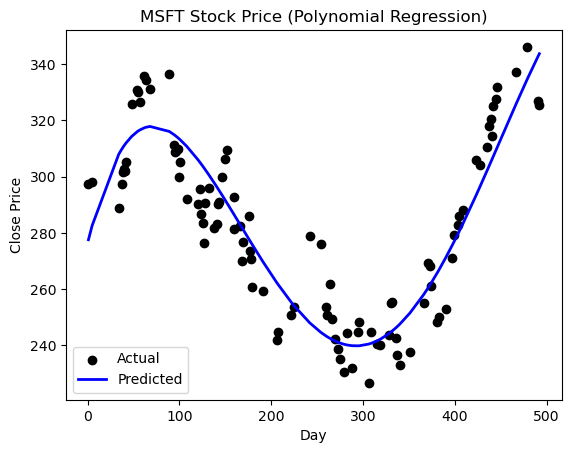

In [21]:
# Plot the results
plot.scatter(plot_data['X_test'], plot_data['y_test'], color='black', label='Actual')
plot.plot(plot_data['X_test'], plot_data['y_pred'], color='blue', linewidth=2, label='Predicted')
plot.title('MSFT Stock Price (Polynomial Regression)')
plot.xlabel('Day')
plot.ylabel('Close Price')
plot.legend()
plot.show()

As we can see, this polynomial seems to more closely follow the actual data, doing a better job at capturing the ups and downs of the stock market.

Now let's evaluate this model's performance.

In [22]:
# Evaluate the model's performance using Error Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = numpy.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R-squared:', r2)
print(f'Mean Absolute Percentage Error: {mape} ({mape*100}%)')

MAE: 10.764434161415776
MSE: 159.56379102712626
RMSE: 12.631856198798586
R-squared: 0.8379727264515106
Mean Absolute Percentage Error: 0.03784516882609493 (3.7845168826094926%)


#### 2.8.3 Polynomial Regression Model Performance

As we can see from the error metrics and from the scatter plot itself, our new polynomial model has performed significantly better than our previous linear model. In particular the $R^2$ shows a much better result that indicates our predictions are able to better capture the actual data's trends.

It isn't always necessary to view all of these metrics, but overall they do tell you different things about your data which may be of interest depending on your application.

#### 2.8.4 Additional Thoughts

As previously mentioned, there are still many additional ways we can improve the performance of this model as stock markets are very complicated and are influenced by many factors.  You saw the performance of our linear regression model increase when we used a degree 4 polynomial as the line of best fit, however this doesn't mean that the higher the degree the more accurate your model will be. Selecting the right degree for the polynomial features is crucial. Too low a degree may result in underfitting, where the model is too simple to capture the underlying trends. Too high a degree, on the other hand, may lead to *overfitting*, where the model becomes too complex and fits the noise in the training data rather than the underlying pattern.

### 2.9 Application Conclusion

So far we have created and enhanced a stock price prediction application using linear regression, starting with a basic model and then improving it with polynomial features. Leveraging libraries like pandas and sklearn, we not only streamlined the development process but also gained insights into error analysis, enabling us to interpret the results and understand the model's performance. 

Our hands-on approach to linear regression was supplemented by a thorough examination of error metrics. However, the complexity behind linear regression was largely handled by sklearn, concealing the intricate calculations within these simple lines of code:

```
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
```

In the next section, we'll peel back the curtain to explore the underlying theory that powers these few lines, diving deeper into the mathematical principles of linear regression and error metrics. This will give us a comprehensive understanding of both the practical and theoretical aspects of linear regression.
  

## 3 Theory

### 3.1 Introduction to the Theory

Linear Regression is a foundational tool in statistical modeling and machine learning. It aims to find the best-fitting straight line through a given set of data points, representing the relationship between variables in your data. While we have seen its application in predicting stock prices, we'll be diving into the theory so we can demystify what's happening behind the scenes in the code. 

### 3.2 The Equation of a Line

The equation of this best-fitting line is given by:

$$ y = mx + b $$

Where $ y $ is the predicted value, $ m $ is the slope or steepness of the line, $ x $ is the input feature, and $ b $ is the y-intercept where the line crosses the y-axis.

In the context of the linear regression model we've been working with, $y$ is the target (stock price) and $x$ is the feature (day). $m$ and $b$ are the parameters we need to find to get a line that best fits our data. But how do we find the best values of $m$ and $b$ that make the line fit our data perfectly?

### 3.3 Finding Parameters $m$ and $b$

To find the best values of $m$ and $b$, you could simply start with a guess, plot the line with your guessed values, and see how well it fits your data. It might be way off, but that's okay. You can change $m$ and $b$ and try again.

You could keep guessing and adjusting $m$ and $b$ until you get a line that looks like it fits well. But how do you know when you've got the best fit? That's where the cost function comes in!

### 3.4 Cost Function

The cost function acts like a guide, telling us how well our line fits the data. It gives you a number that represents how far off your line is from the actual data points. The lower the number, the better the fit. In other words, in order to find the values of $m$ and $b$ so that we can have the equation of a line that best fits our data, we need to minimize the cost function.

A common cost function is the Mean Squared Error (MSE). As you may recall from [section 2.7.2](#272-mean-squared-error-mse), The MSE is like a strict teaher grading our line's predictions. It calculates the average of the squared differences between the predicted and actual values, as expressed in this formula:

$$ J(m,b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (mx_i + b))^2 $$

Here's what each part means:
- $n$: the number of data points
- $y_i$: the actual value of the $ i $-th data point
- $mx_i + b$: the predicted value of the $ i $-th data point
- $(y_i - (mx_i + b))^2$: the squared difference between the actual and predicted values for the $ i $-th data point

The summation symbol $\sum$ means that we sum these squared differences for all data points, and then divide by $ n $ to get the mean. The squaring part amplifies larger errors, so big mistakes are penalized far more than smaller ones. This approach makes sure that underestimating and overestimating are treated equally, focusing the model on avoiding large errors. A lower MSE means the line fits the data better, while a higher MSE suggests more significant mistakes.

As you can imagine, starting with a guess of $m$ and $b$ and then calculating the cost function and then repeating these steps over and over until you find some good values for $m$ and $b$ is very difficult and tedious. How would you know how to adjust $m$ and $b$ to get a lower error? We would need a systematic way to make changes to $m$ and $b$ based on what error we get. Luckily, we do have a systematic way of doing just this and it's called gradient descent.

### 3.5 Gradient Descent

Imagine the cost function as a bumpy hill. On this hill, your position is given by the parameters $m$ and $b$, they're like your coordinates. At your position, how high up you are on the hill represents the value of the cost function. The higher up you go on the hill the greater the error. The lower you go the lower the error. Since the goal is to minimize the cost function to keep the error as low as possible, you would want to go to the lowest point on the hill you can and record your "coordinates" $m$ and $b$ at that point so you capture the optimal values. Gradient descent is like a guide telling you exactly which direction to head after every step to reach the lowest point and minimize the cost function. Once you've minimized the cost function you will have found the optimal $m$ and $b$ values for your line equation.

Now that we've built an intuition for gradient descent, let's take a look at the mathematical representation.

#### 3.5.1 Equations

Gradient descent operates by taking the partial derivatives of the cost function with respect to the parameters $m$ and $b$. These derivatives tell you how the cost function changes as you change $m$ and $b$, which in turn guides you in adjusting those parameters to minimize the cost function.

The equations for updating $ m $ and $ b $ are:

$$
\begin{align*}
m & := m - \alpha \frac{\partial}{\partial m} J(m,b) \\
b & := b - \alpha \frac{\partial}{\partial b} J(m,b)
\end{align*}
$$

- **$\bm{m}$ and $\bm{b}$**: These are the parameters we're trying to optimize. They define the slope and the y-intercept of our line, respectively.
- **$\bm{\alpha}$**: This is called the learning rate. It's like a step size. If it's too big, you might step over the lowest point. If it's too small, you might take forever to get there.
- **Partial Derivatives ($\frac{\partial}{\partial m}$ and $\frac{\partial}{\partial b}$)**: These tell us how steep the hill is. If it's really steep, the partial derivatives are big, and if it's flat, they are small. These guide how much we change $m$ and $b$ at each step.

By repeating these equations, we can move $m$ and $b$ little by little, always in the direction that decreases our error, until we find the best values for $m$ and $b$.

Again, with linear regression, the goal is to find a line that best fits our data. To find this line, whose equation is given by $y = mx+b$ we'll start out with initial guesses for $m$ and $b$. Then, we'll use gradient descent to iteratively calculate the cost function and modify the $m$ and $b$ values until we have obtained the lowest cost function we can. The result will be the $m$ and $b$ values we can use to obtain the line equation $y = mx+b$ of the line that best fits our data.

#### 3.5.2 Example

Let's walk through an example to see how we can use the intuition we've built along with the mathematical formulas to perform linear regression on a data set. 

Imagine we have a data set representing the relationship between the number of hours a student studied and the scores they achieved in an exam. We want to find the line that best describes this relationship. Our goal is to use linear regression to predict exam scores based on the number of hours studied for this student.

**Step 1: Define the data**

We'll create some data here for the hours a student has studied and the exam scores they've received

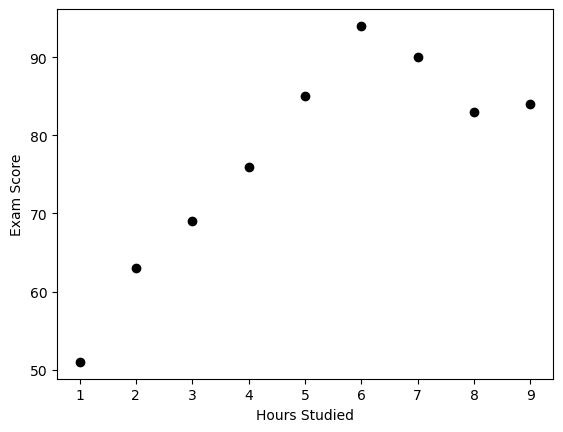

In [23]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# create data for the test scores
hours_studied = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
exam_scores = np.array([51, 63, 69, 76, 85, 94, 90, 83, 84])


# Show the initial data
plt.scatter(hours_studied, exam_scores, label='Data', color="black")
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

**Step 2: Initial Guess**

We'll start by guessing initial values for $m$ and $b$

In [24]:
initial_m = 0
initial_b = 0

**Step 3: Define the Cost Function (MSE)**

We'll need to have a way to caculate the error, so we'll create a cost function implementation of MSE

In [25]:
def cost_function(m, b, x, y):
    n = len(x)
    total_error = np.sum((y - (m * x + b)) ** 2)
    return total_error / n

**Step 4: Gradient Descent**

Now that we have the data and the function, let's define a gradient descent function that will calculate and find the line that best fits our data. Recall that the gradient descent formula is given by

$$
\begin{align*}
m & := m - \alpha \frac{\partial}{\partial m} J(m,b) \\
b & := b - \alpha \frac{\partial}{\partial b} J(m,b)
\end{align*}
$$

to update the values of $m$ and $b$ after each "step" $\alpha$, we need to take the partial derivates of the cost function MSE:
$$ J(m,b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (mx_i + b))^2 $$

Using the chain rule, we get the resulting partial derivative with respect to $m$ as:
$$ \frac{\partial J}{\partial m} = \frac{2}{n}\sum_{i=1}^{n} ((mx_i + b - y_i) * x_i)$$

Which can be expressed in code as:
```
gradient_m = (2 / n) * sum(((m*x + b) - y) * x)
```

Likewise, using the chain rule we get that the partial derivtive with respect to $b$ is:
$$ \frac{\partial J}{\partial b} = \frac{2}{n}\sum_{i=1}^{n} (mx_i + b - y_i) $$

Which can be expressed in code as:
```
gradient_b = (2 / n) * sum((m*x + b) - y)
```

Now, putting this all together, we can write our gradient_descent function as follows:


In [26]:
def gradient_descent(x, y, m, b, learning_rate=0.01, iterations=1000):
    n = len(x)

    for iteration in range(iterations):
        y_pred = m * x + b
        gradient_m = (2 / n) * np.sum((y_pred - y) * x)
        gradient_b = (2 / n) * np.sum(y_pred - y)
        m = m - learning_rate * gradient_m
        b = b - learning_rate * gradient_b

    return m, b

**Step 5: Find the Optimal Solution**

Now that we have our gradient descent function, we can use it to find the optimal values for $m$ and $b$ so that we can find the line that best fits our data.

In [27]:
m, b = gradient_descent(hours_studied, exam_scores, initial_m, initial_b)
print(f"Optimal m: {m}, Optimal b: {b}")

Optimal m: 4.340463215979749, Optimal b: 55.33839131901557


**Step 6: Putting it All Together**

Now that we have found the optimal values for $m$ and $b$, we can use that to create our line of best fit and plot it to compare how well it does in describing our data.

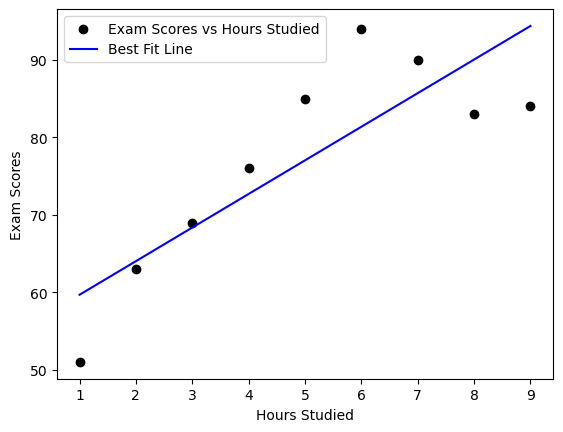

In [28]:
import matplotlib.pyplot as plt
# y = mx + b
predicted_y = m * hours_studied + b
plt.scatter(hours_studied, exam_scores, color="black", label='Exam Scores vs Hours Studied')
plt.plot(hours_studied, predicted_y, color='blue', label='Best Fit Line')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Scores')
plt.legend()
plt.show()

### 4 Conclusion

Linear regression, despite its simplicity, is a powerful tool used in various fields, from finance to healthcare. We've explored linear regression from both practical and theoretical perspectives. We've seen how it can be applied to real-world problems like stock price prediction and then delved into the underlying mathematics.

Understanding linear regression is not only valuable in its own right but also serves as a stepping stone to more complex machine learning models and techniques. As you continue your journey in machine learning, the principles and methods explored here will serve as a solid foundation.

#### 4.1 Next Steps:
1. **Linear Regressing With Multiple Inputs**: The linear regression models we've looked at so far have been quite simple. There are several ways in which we can further improve these models. [Let's dive deeper into linear regression to see how this all works, both in theory and in application](./Linear%20Regression%20-%20Deeper%20Dive.ipynb).
2. **Logistic Regression**: Having explored linear regression, we're ready to delve into the world of classification. In the next document, we'll explore Logistic Regression, a vital stepping stone to understanding how we can categorize data into distinct classes. [Continue to Logistic Regression](../logistic-regression/Logistic%20Regression.ipynb)